Found 5778 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
Class distribution in training data:
Class 0: 2286 images
Class 1: 1046 images
Class 2: 1516 images
Class 3: 757 images
Class 4: 173 images


C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50


C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.1824 - loss: 2.1392 - val_accuracy: 0.1789 - val_loss: 1.6097 - learning_rate: 0.0010
Epoch 2/50
  1/180 ━━━━━━━━━━━━━━━━━━━━ 2:03 692ms/step - accuracy: 0.2500 - loss: 1.8570

C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2500 - loss: 0.9337 - val_accuracy: 0.1667 - val_loss: 0.8050 - learning_rate: 0.0010
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.0739 - loss: 1.6419 - val_accuracy: 0.1348 - val_loss: 1.6097 - learning_rate: 0.0010
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1562 - loss: 0.7857 - val_accuracy: 0.1250 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.1589 - loss: 1.6194 - val_accuracy: 0.0312 - val_loss: 1.6101 - learning_rate: 5.0000e-04
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0625 - loss: 0.6620 - val_accuracy: 0.0000e+00 - val_loss: 0.8049 - learning_rate: 5.0000e-04
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.2001 - loss: 1.5835 - val_accuracy: 0.0312 - val_loss: 1.6100 - learning_rate: 5.0000e-04
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0938 - loss: 0

C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAAREN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       639
           1       0.00      0.00      0.00       296
           2       0.27      1.00      0.43       447
           3       0.00      0.00      0.00       223
           4       0.00      0.00      0.00        51

    accuracy                           0.27      1656
   macro avg       0.05      0.20      0.09      1656
weighted avg       0.07      0.27      0.11      1656



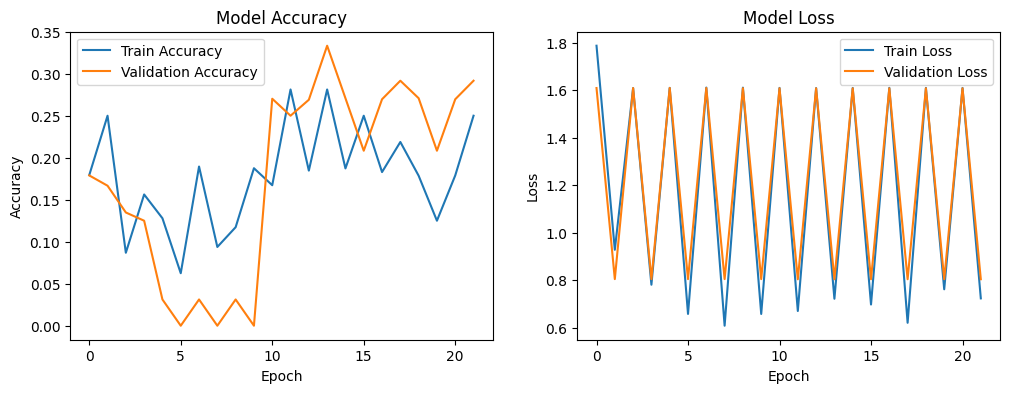

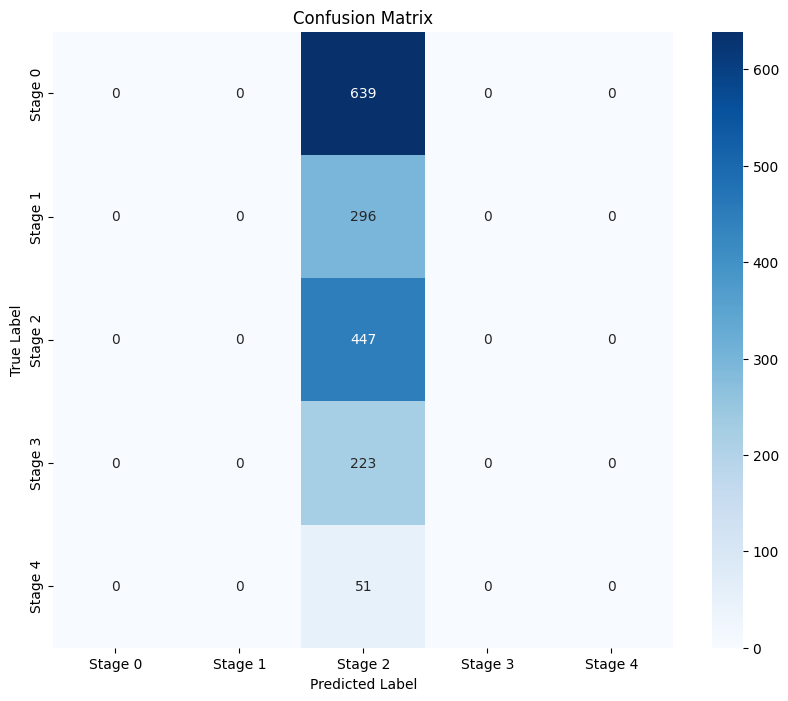

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths
train_dir = r"C:\Users\NAAREN\Downloads\archive\train"
test_dir = r"C:\Users\NAAREN\Downloads\archive\test"

# Enhanced Data Augmentation for Medical Images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Check class distribution
class_distribution = train_generator.classes
unique, counts = np.unique(class_distribution, return_counts=True)
print("Class distribution in training data:")
for i, (label, count) in enumerate(zip(unique, counts)):
    print(f"Class {i}: {count} images")

# Custom Model Architecture
def create_custom_model(input_shape=(224, 224, 3), num_classes=5):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_custom_model()

# Learning Rate Schedule
def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return lr

# Callbacks
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_generator.classes),
                                                  y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    callbacks=[lr_scheduler, early_stopping],
    class_weight=class_weights
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)

# Use the model to make predictions
predictions = model.predict(test_generator)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Evaluate the model using classification report
print('Classification Report:')
print(classification_report(true_labels, predicted_labels))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(true_labels, predicted_labels, ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])

# Define a function to predict the stage of knee pain
def predict_knee_pain(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    
    prediction = model.predict(img)[0]
    predicted_label = np.argmax(prediction)
    
    stages = ['Stage 0: No knee pain',
              'Stage 1: Mild knee pain',
              'Stage 2: Moderate knee pain',
              'Stage 3: Severe knee pain',
              'Stage 4: Extreme knee pain']
    
    result = {stage: prob for stage, prob in zip(stages, prediction)}
    return stages[predicted_label], result



In [4]:
# Test the function
image_path = r"C:\Users\NAAREN\Downloads\archive\test\3\9946846L.png"
predicted_stage, probabilities = predict_knee_pain(image_path)
print(f"Predicted stage: {predicted_stage}")
print("Probabilities for each stage:")
for stage, prob in probabilities.items():
    print(f"{stage}: {prob:.4f}")

# Save the model
model.save('knee_osteoarthritis_model.h5')
print("Model saved as 'knee_osteoarthritis_model.h5'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Predicted stage: Stage 2: Moderate knee pain
Probabilities for each stage:
Stage 0: No knee pain: 0.2003
Stage 1: Mild knee pain: 0.1998
Stage 2: Moderate knee pain: 0.2004
Stage 3: Severe knee pain: 0.1994
Stage 4: Extreme knee pain: 0.2001
Model saved as 'knee_osteoarthritis_model.h5'
